## Understanding the Mathematics behind Gradient Descent

***Objective:*** Gradient descent algorithm is an iterative process that takes us to the minimum of a
function(barring some caveats). The formula below sums up the entire Gradient Descent algorithm
in a single line.

<img src="img3/gd.png" width="600">

But how do we arrive at this formula? Well, It is actually very simple and just includes some high
school maths. Through this article, we shall try to understand as well as recreate this formula in the
context of a Linear Regression model.

### A Machine Learning Model ###

1. Consider a bunch of data points in a 2 D space. Assume that the data is related to the height
and weight of a group of students. We are trying to predict some kind of relationship
between these quantities so that we could predict the weight of some new students
afterwards. This is essentially a simple example of a supervised Machine Learning
technique.
2. Let us now draw an arbitrary line in space that passes through some of these data points. The
equation of this straight line would be Y = mX + b where m is the slope and b is its
intercept on the Y-
axis.

<img src="img3/slope.png" width="600">


#### Predictions ####

<img src="img3/ml.png" width="400">

Given a known set of inputs and their corresponding outputs, A machine learning model tries to
make some predictions for a new set of inputs.The Error would be the difference between the two
predictions.
This relates to the idea of a Cost function or Loss function.

## Cost Function##
A Cost Function/Loss Function evaluates the performance of our Machine Learning Algorithm.
The Loss function computes the error for a single training example while the Cost function is theaverage of the loss functions for all the training examples. Henceforth, I shall be using both the
terms interchangeably.
A Cost function basically tells us ‘ how good’ our model is at making predictions for a given
value of m and b.
Let’s say, there are a total of ’N’ points in the dataset and for all those ’N’ data points we want to
minimize the error. So the Cost function would be the total squared error i.e

<img src="img3/cost.png" width="200">


Why do we take the squared differences and simply not the absolute differences? Because the
squared differences make it easier to derive a regression line. Indeed, to find that line we need to
compute the first derivative of the Cost function, and it is much harder to compute the derivative of
absolute values than squared values. Also, the squared differences increase the error distance, thus,
making the bad predictions more pronounced than the good ones.

**Minimizing the Cost Function**

The goal of any Machine Learning Algorithm is to minimize the Cost Function.
This is because a lower error between the actual and the predicted values signifies that the algorithm
has done a good job in learning. Since we want the lowest error value, we want those $m$ and $b$
values which give the smallest possible error.
How do we actually minimize any function?
If we look carefully, our Cost function is of the form $Y = X^2$ . In a Cartesian coordinate system, this
is an equation for a parabola and can be graphically represented as

<img src="img3/parabola.png" width="500">


To minimise the function above, we need to find **that value of X that produces the lowest value of
Y** which is the **red dot**. It is quite easy to locate the minima here since it is a 2D graph but this may
not always be the case especially in case of higher dimensions. For those cases, we need to devise
an algorithm to locate the minima, and that algorithm is called **Gradient Descent**.


### Gradient Descent###
Gradient descent is one of the most popular algorithms to perform optimization and by far the
most common way to optimize neural networks. It is an iterative optimisation algorithm used to find
the minimum value for a function.
Intuition
Consider that you are walking along the graph below, and you are currently at the ‘green’ dot. Your
aim is to reach the minimum i.e the ‘red’ dot, but from your position, you are unable to view it.


<img src="img3/parabola_gd.png" width="500">


Possible actions would be:
    1. You might go upward or downward
    2. If you decide on which way to go, you might take a bigger step or a little step to reach your
destination.
**Essentially, there are two things that you should know to reach the minima, i.e. which way to
go and how big a step to take.**
Gradient Descent Algorithm helps us to make these decisions efficiently and effectively with the
use of derivatives. A derivative is a term that comes from calculus and is calculated as the slope of
the graph at a particular point. The slope is described by drawing a tangent line to the graph at the
point. So, if we are able to compute this tangent line, we might be able to compute the desired
direction to reach the minima. We will talk about this in more detail in the later part of the article.


### The Minimum Value###
In the same figure, if we draw a tangent at the green point, we know that if we are moving upwards,
we are moving away from the minima and vice versa. Also, the tangent gives us a sense of the
steepness of the slope.

<img src="img3/parabola_gd.png" width="500">

The slope at the blue point is less steep than that at the green point which means it will take much
smaller steps to reach the minimum from the blue point than from the green point.

# Linear regression #

### Correlation measures the linear relationship between two variables
We see a linear relationship between pay and age. Pay seems to be positively <b>correlated</b> with age; i.e. the older someone is, the more they tend to get paid. Thus, it could be that there are more men in our dataset that are older and the pay difference between men and women we see could be a consequence of this. The quantity <b>correlation</b> measures how linear the relationship between two variables is. Guess the correlation between pay and age. 


To get warmed up on the concept of correlation, here are some simulated scenarios. In each of these cases, guess the correlation:

```
conda install -c conda-forge bqplot
conda install seaborn
conda install statsmodels
conda install ipywidgets
```

In [2]:
import numpy as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
%matplotlib inline
plt.style.use('ggplot')
import os

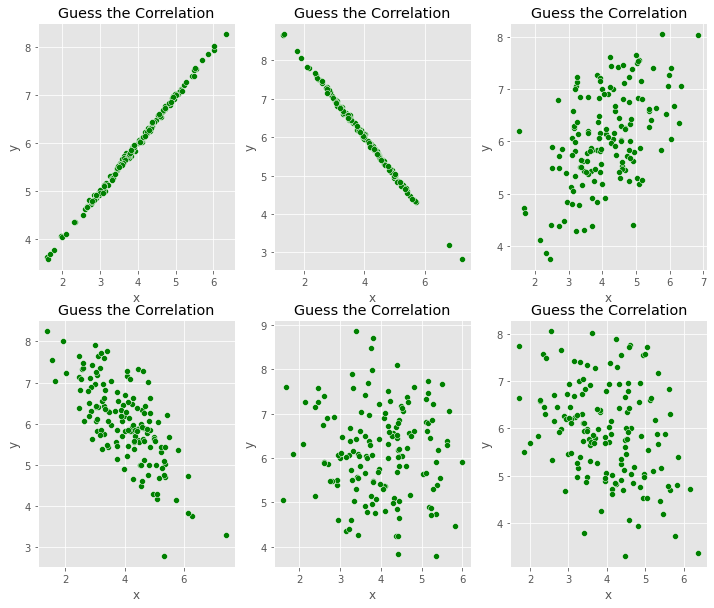

In [3]:
plt.figure(figsize=(12,10))
rho = [0.999, -0.999, 0.5, -0.7,0.001,-0.3]
cor_list = []
np.random.seed(10)
for i, r in enumerate(rho):
    plt.subplot(2,3,i+1)
    mean, cov = [4, 6], [(1, r), (r, 1)]
    x, y = np.random.multivariate_normal(mean, cov, 150).T
    ax = sns.scatterplot(x=x, y=y, color="g")
    cor_list.append(np.corrcoef(x,y)[0,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Guess the Correlation")

In [7]:
cor_list

[0.9990081442281228,
 -0.9992506121564401,
 0.5047051300834758,
 -0.722898221972322,
 -0.040411257687132,
 -0.3208318426338665]

### Question:###

If the correlation between two variables is zero, then the two variables are unrelated. Is this true or false?

**Answer**:



The following interactive visualization gives you a few scenarios. Try to find the line of best fit in each scenario:

In [4]:

from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *

def run_scenario(scenario='1'):
    
    #determing which scenario this is
    if (scenario == '1'):
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000]
    elif (scenario=='2'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 26, 28, 30, 32, 34, 36, 38, 40, 20, 24]
        y_coor = [50000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 85000, 70000]
    elif (scenario=='3'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 32, 34, 36, 38, 40, 38, 36]
        y_coor = [50000, 53000, 60000, 80000, 75000, 88000, 90000, 92000, 50000, 52000]
    elif (scenario=='4'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 38, 40, 35, 22]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 90000, 92000, 55000, 90000]

    # defining linear scale for x,y axes
    x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
    y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

    # creating x,y axes using linear scales above
    ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
    ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

    #adding scatter marks
    names = []

    for i in range(0, len(x_coor)):
        name = str(x_coor[i]) + ', ' + str(y_coor[i])
        names.append(name)

    def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

    scatter_dots = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, tooltip=def_tt, unhovered_style={'opacity': 0.5})
#     scatter2 = Scatter(x=[x_coor[1]], y=[y_coor[1]], scales={'x': x_sc, 'y': y_sc}, enable_move=True)

    # defining in regression line
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_x_squared = 0
    sum_y_squared = 0
    n = len(x_coor)

    for i in range(0, len(x_coor)):
        sum_x += x_coor[i]
        sum_y += y_coor[i]
        sum_xy += sum_x * sum_y
        sum_x_squared += sum_x * sum_x
        sum_y_squared += sum_y * sum_y


    a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
    b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

    y_hat_values = []

    for x in x_coor:
        new_y_val = a + (b * x)
        y_hat_values.append(new_y_val)

    regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'], visible=False)

    #user interaction, drawing a line

    user_line_x = [19, 40]
    user_line_y = [60000, 60000]

    starting_user_line = Lines(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
    
    scatter = Scatter(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, unhovered_style={'opacity': 0.5}, enable_move=True, colors=['black'])

    #create figures and render
    fig = Figure(marks=[scatter_dots, scatter, starting_user_line, regression_line], axes=[ax_x, ax_y], title="Find the Regression Line of Best Fit")
    

    #add in dropdown menu
    dropdown = widgets.Dropdown(
        options=['1', '2', '3', '4'],
        value=scenario,
        description='Scenario:',
        disabled=False,
    )

    out = Output()
    display(out)
    
    def handler(x):
        print('hi')
    
    @out.capture()
    def observe_scatter_x_y(point, change):
        
        
        x_array = point.x
        y_array = point.y
        find_change_x = change['point']['x']
        find_change_y = change['point']['y']
        hovered_point = point.hovered_point
        
        
        
        if (hovered_point == 0):
            starting_user_line.set_trait('x', [find_change_x, x_array[1]]) 
            starting_user_line.set_trait('y', [find_change_y, y_array[1]])
#             starting_user_line.y[0] = find_change_y
#             starting_user_line.x[0] = starting_user_line.x.pop(0)
#             starting_user_line.y = starting_user_line.y.pop(0)
#             starting_user_line.x = starting_user_line.x.insert(0, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(0, find_change_y)
        elif (hovered_point == 1):
            starting_user_line.set_trait('x', [x_array[0], find_change_x]) 
            starting_user_line.set_trait('y', [y_array[0], find_change_y])
#             starting_user_line.x = starting_user_line.x.pop(1)
#             starting_user_line.y = starting_user_line.y.pop(1)
#             starting_user_line.x = starting_user_line.x.insert(1, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(1, find_change_y)
            
        
        
        
#         if change['name'] == 'x':
#             line.x = line.x + change['new'] - change['old']
#         else:
#             line.y = line.y + change['new'] - change['old']
    
    scatter.on_drag(observe_scatter_x_y)

    @out.capture()
    def on_dropdown_change(b):
        fig.close()
        button.close()
        dropdown.close()
        run_scenario(dropdown.value)
       
    dropdown.observe(on_dropdown_change, 'value')

    #add clicking action for submit
    button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

    def on_button_clicked(b):
        regression_line.set_trait('visible', True)

    button.on_click(on_button_clicked)
    
    box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

    box = Box(children=[button], layout=box_layout)

    display(dropdown, fig, box)

run_scenario()

Output()

Dropdown(description='Scenario:', options=('1', '2', '3', '4'), value='1')

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

### Residuals (5 mts)

The <b>residual</b> represents the difference between the actual observation and the one predicted by the linear regression line, as shown below:

Instructions:
    - Hover over the data points and you will see their (x,y) coordinates
    - Select (by clicking) the point you believe to have the largest residual
    - When you have selected, click 'See Answer' to see the result

In [5]:
from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *


# defining x,y coordinates, scenario 1
x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 39]
y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 52000]

# defining linear scale for x,y axes
x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

# creating x,y axes using linear scales above
ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

#adding scatter marks
names = []

for i in range(0, len(x_coor)):
    name = str(x_coor[i]) + ', ' + str(y_coor[i])
    names.append(name)

def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

scatter = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, opacity=[0.5], tooltip=def_tt, selected_style={'fill':'red', 'stroke': 'red'}, selected=[5])

out = Output()
display(out)


@out.capture()
def on_scatter_click(marks, dot):
    marks.set_trait('selected', [dot['data']['index']])
    
scatter.on_element_click(on_scatter_click)

# defining in regression line
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_squared = 0
sum_y_squared = 0
n = len(x_coor)

for i in range(0, len(x_coor)):
    sum_x += x_coor[i]
    sum_y += y_coor[i]
    sum_xy += sum_x * sum_y
    sum_x_squared += sum_x * sum_x
    sum_y_squared += sum_y * sum_y


a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

y_hat_values = []

for x in x_coor:
    new_y_val = a + (b * x)
    y_hat_values.append(new_y_val)

regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'])


#create figures and render
fig = Figure(marks=[scatter, regression_line], axes=[ax_x, ax_y], title='Find the Largest Residual',)


#add clicking action for submit
button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

@out.capture()
def on_button_clicked(b):
    answer = 12
    scatter.set_trait('selected', [answer])
    residual_line=Lines(x=[x_coor[answer], x_coor[answer]], y=[y_coor[answer], y_hat_values[answer]], scales={'x': x_sc, 'y': y_sc}, colors=['red'])
    fig.set_trait('marks', [scatter, regression_line, residual_line])
    

button.on_click(on_button_clicked)

box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

box = Box(children=[button], layout=box_layout)

display(fig, box)

Output()

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

### Using the Gradient Descent Algorithm ### 

7.574168096468631